# Изучение закономерностей определяющих успешность игр

Описание проекта: Мне, как сотруднику магазина "Стримчик", предстоит разобраться в том, какие платформы будут популярны в следующем году. А так же что влияет на успех или провал игры. Делать я это буду на основе данных по продаже игр за прошлые годы

## Изучение Данных

In [1]:
import pandas as pd
from IPython.display import HTML, display
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\sb_projects1.csv')
df.info()
display(df.head())
print(df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64


### Вывод: 
У нас таблица с относительно небольшим число столбцов. Пропуски есть почти в каждом втором столбце. Их надо обработать

## Подготовка данных

In [3]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [4]:
df = df.dropna(subset = ['name', 'year_of_release'])
print(df.isna().mean())

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64


Удаляем пропуски, так как в этих столбцах их процент крайне мал

In [5]:
# Здесь заполняем пропуски маркерами, для удобства фильтрации таблицы. Так как пропусков слишком много их их нельзя удалять.
# Для каких-то игр могло быть слишком мало оценок и рейтинг не сформировался. Какие-то игры очень старые и данных могло не быть вообще
df['critic_score'] = df['critic_score'].fillna(-99)
df['user_score'] = df['user_score'].fillna(-99)
df['rating'] = df['rating'].fillna(-99)

In [6]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')


In [7]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99,-99,-99,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99,-99,-99,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-99,-99,-99,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-99,-99,-99,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-99,-99,-99,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-99,-99,-99,0.01


In [8]:
#df['user_score'] = df['user_score'].str.lower()
df.loc[df['user_score'] == 'tbd', 'user_score'] = -99
df['user_score'] = df['user_score'].astype('float')
df.info()
print(df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB
name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
c

### Вывод: 
Данные подготовлены. Приступаем к анализу

## Исследовательский анализ данных

### Узнаем сколько игр выпускалось в разные годы:

In [9]:
df_year = df.pivot_table(index = ['year_of_release'], values = 'name', aggfunc = 'count')
display(df_year)


,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 1.0, 'Продажи игр по годам')

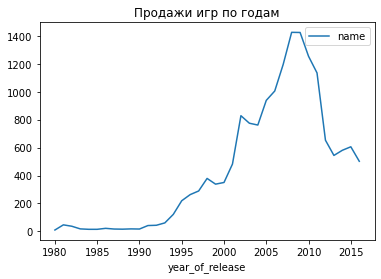

In [63]:
df_year.plot()
plt.title('Продажи игр по годам')


до 1995 игр продавалось очень мало, этими данными можно принебречь

In [11]:
df2 = df.query('year_of_release > 1994')

In [12]:
platform_sum = df2.pivot_table(index = ['platform'] , values = 'sum_sales', aggfunc = 'sum')
print(platform_sum.sort_values(by = 'sum_sales', ascending = False))


          sum_sales
platform           
PS2         1233.56
X360         961.24
PS3          931.34
Wii          891.18
DS           802.76
PS           721.55
PS4          314.14
GBA          312.88
PSP          289.53
3DS          257.81
XB           251.57
PC           239.79
N64          218.01
GC           196.73
XOne         159.32
GB           139.90
WiiU          82.19
PSV           53.81
SNES          49.59
SAT           29.94
DC            15.95
WS             1.42
NG             0.43
TG16           0.16
3DO            0.08
PCFX           0.03


Посчитали сумму всех продаж по платформам. Увидели 6 явных фаворитов и 5 платформ,для которых игры почти не продаются. Среди популярных бросается в глаза 3 версии PSки

### Посмотрим как менялись продажи самых популярных платформ по годам

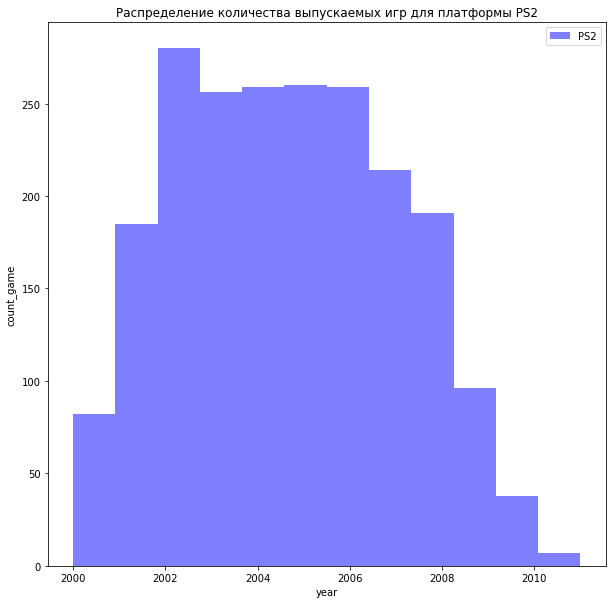

In [13]:
ax1 = df2.query('platform == "PS2"')['year_of_release'].hist(
    color='blue',
    grid=False,
    alpha=0.5,
    bins=12,
    figsize=(10,10),
    label = 'PS2')
plt.title('Распределение количества выпускаемых игр для платформы PS2')
plt.xlabel('year')
plt.ylabel('count_game')

 
ax1.legend()
#df2.query('platform == "PS2"')['year_of_release'].value_counts()

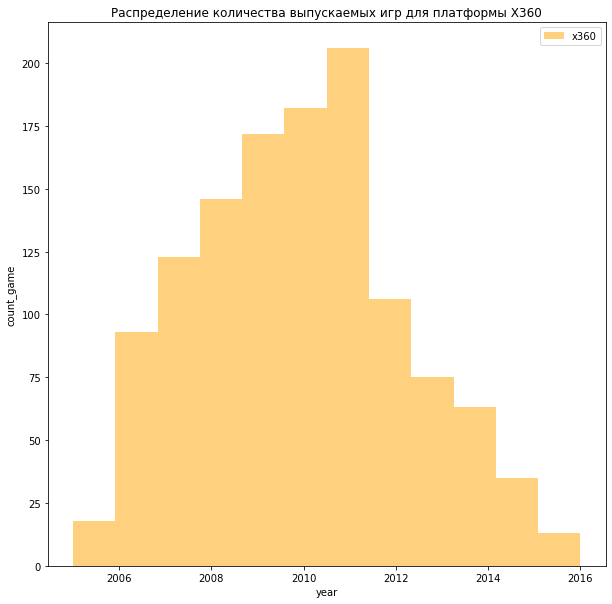

In [14]:
ax2 = df2.query('platform == "X360"')['year_of_release'].hist(
    color='orange',
    grid=False,
    alpha=0.5,
    bins=12,
    figsize=(10,10),
    label = 'x360')
plt.title('Распределение количества выпускаемых игр для платформы X360')
plt.xlabel('year')
plt.ylabel('count_game')
ax2.legend()
#df2.query('platform == "X360"')['year_of_release'].value_counts()

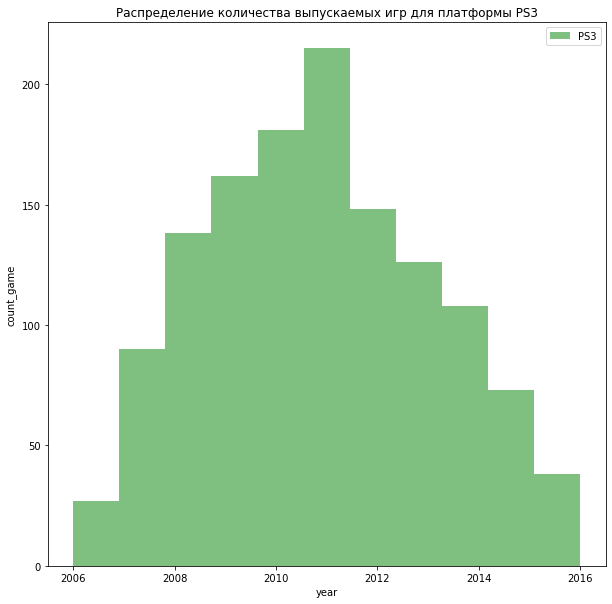

In [15]:
ax3 = df2.query('platform == "PS3"')['year_of_release'].hist(
    color='green',
    grid=False,
    alpha=0.5,
    bins=11,
    figsize=(10,10),
    label = 'PS3')
plt.title('Распределение количества выпускаемых игр для платформы PS3')
plt.xlabel('year')
plt.ylabel('count_game')
ax3.legend()
#df2.query('platform == "PS3"')['year_of_release'].value_counts()

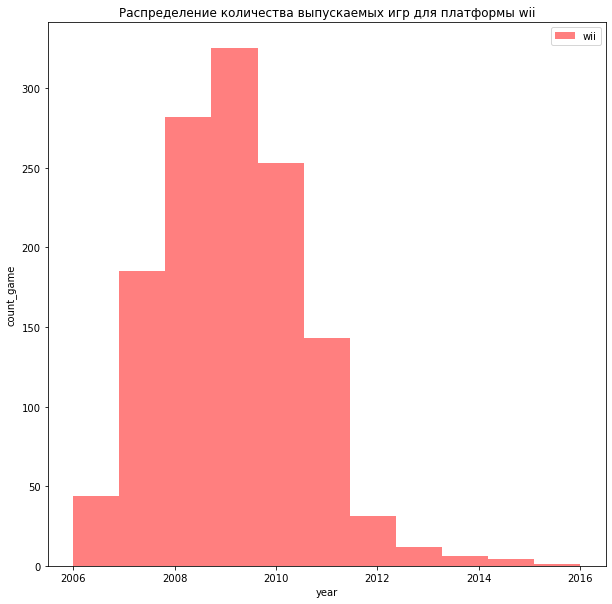

In [16]:
ax4 = df2.query('platform == "Wii"')['year_of_release'].hist(
    color='red',
    grid=False,
    alpha=0.5,
    bins=11,
    figsize=(10,10),
    label = 'wii')
plt.title('Распределение количества выпускаемых игр для платформы wii')
plt.xlabel('year')
plt.ylabel('count_game')
ax4.legend()
#df2.query('platform == "Wii"')['year_of_release'].value_counts()

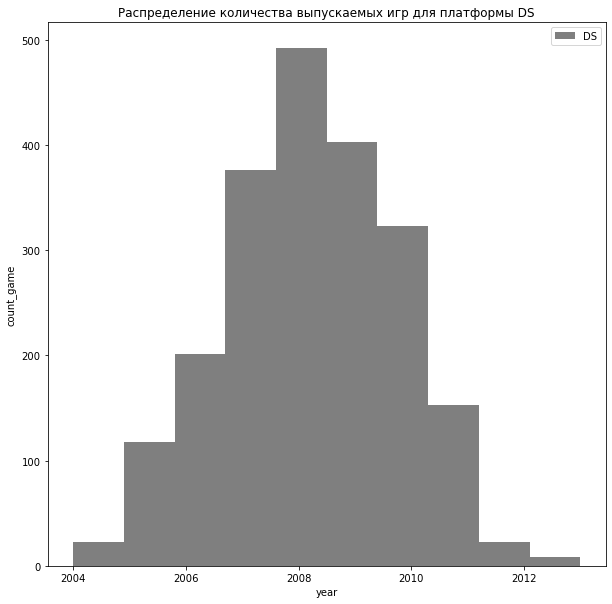

In [17]:
ax5 = df2.query('platform == "DS"')['year_of_release'].hist(
    color='black',
    grid=False,
    alpha=0.5,
    bins=10,
    figsize=(10,10),
    label = 'DS')
plt.title('Распределение количества выпускаемых игр для платформы DS')
plt.xlabel('year')
plt.ylabel('count_game')
ax5.legend()
#df2.query('platform == "DS"')['year_of_release'].value_counts()

 На графиках видно,что платформа живёт около 10 лет

In [19]:
#Выберем актуальный период с 2014 года
new = df2.query('year_of_release > 2013')
platform_sum_new = new.pivot_table(index = ['platform'] , values = 'sum_sales', aggfunc = 'sum')
print(platform_sum_new.sort_values(by = 'sum_sales', ascending = False))

          sum_sales
platform           
PS4          288.15
XOne         140.36
3DS           86.68
PS3           68.18
X360          48.22
WiiU          42.98
PC            27.05
PSV           22.40
Wii            5.07
PSP            0.36


Text(0, 0.5, 'sum_sales')

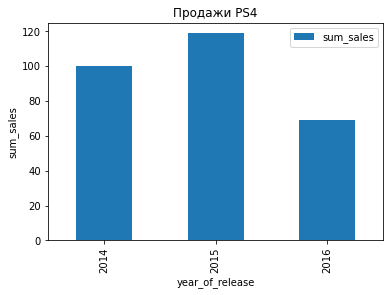

In [20]:
new.query('platform == "PS4"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи PS4')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

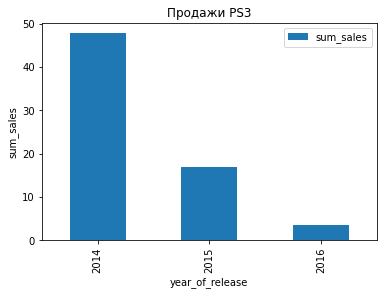

In [21]:
new.query('platform == "PS3"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи PS3')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

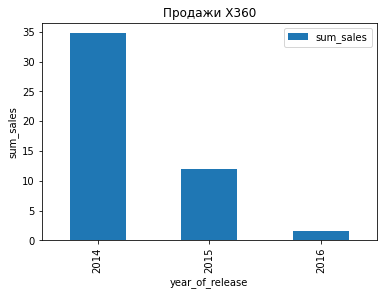

In [22]:
new.query('platform == "X360"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи X360')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

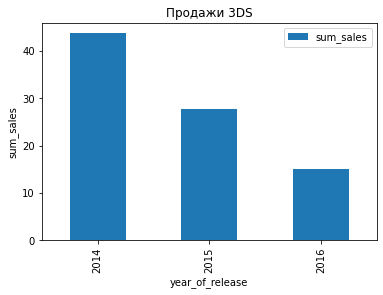

In [23]:
new.query('platform == "3DS"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи 3DS')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

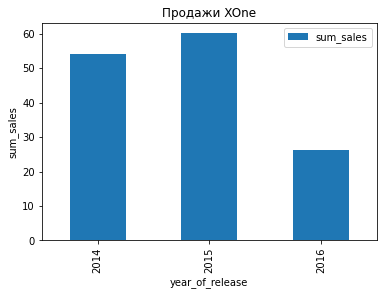

In [24]:
new.query('platform == "XOne"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи XOne')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

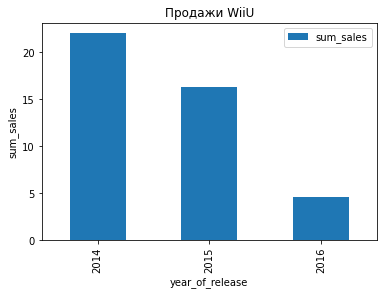

In [25]:
new.query('platform == "WiiU"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи WiiU')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

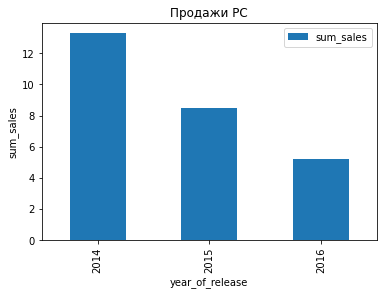

In [26]:
new.query('platform == "PC"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи PC')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

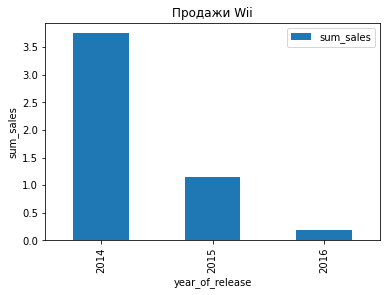

In [27]:
new.query('platform == "Wii"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи Wii')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

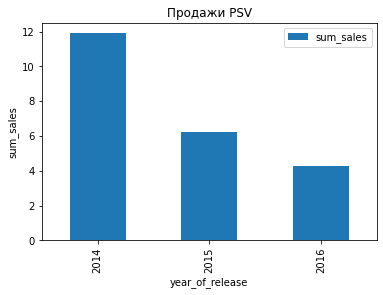

In [28]:
new.query('platform == "PSV"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи PSV')
plt.ylabel('sum_sales')

Text(0, 0.5, 'sum_sales')

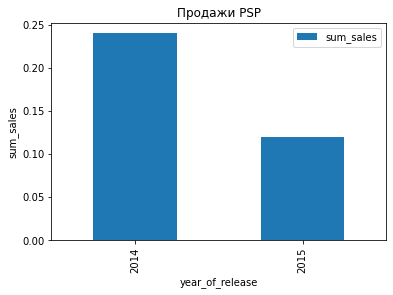

In [29]:
new.query('platform == "PSP"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc ='sum').plot(kind='bar')
plt.title('Продажи PSP')
plt.ylabel('sum_sales')

Графики показывают, что PS3 , X360 и 3DS падают впродажах, а вот Xone и PS4 растут. В ближайшие 2-3 года две последних и будут потенциально прибыльными платформами

In [30]:
new['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [31]:
ps4 = new.query('platform == "PS4"')
ps3 = new.query('platform == "PS3"')
x360 = new.query('platform == "X360"')
ds3 = new.query('platform == "3DS"')
xone = new.query('platform == "XOne"')
    

Text(0.5, 1.0, 'Продажи PS4')

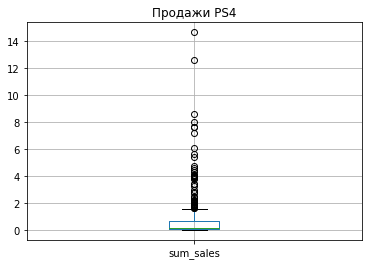

In [32]:
ps4.boxplot('sum_sales')
plt.title('Продажи PS4')

Text(0.5, 1.0, 'Продажи PS3')

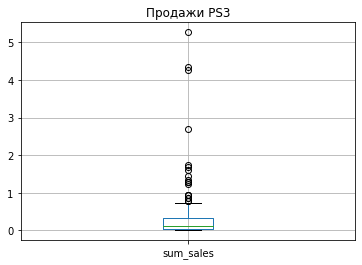

In [33]:
ps3.boxplot('sum_sales')
plt.title('Продажи PS3')

Text(0.5, 1.0, 'Продажи X360')

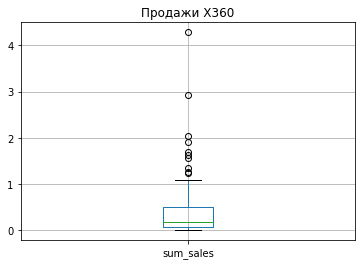

In [34]:
x360.boxplot('sum_sales')
plt.title('Продажи X360')

Text(0.5, 1.0, 'Продажи 3DS')

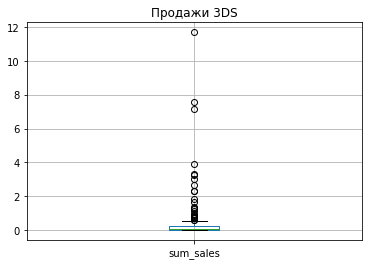

In [35]:
ds3.boxplot('sum_sales')
plt.title('Продажи 3DS')

Text(0.5, 1.0, 'Продажи XOne')

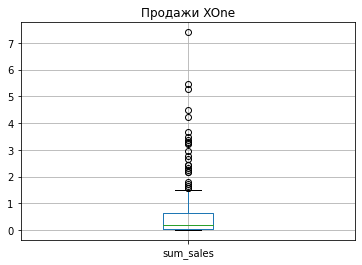

In [36]:
xone.boxplot('sum_sales')
plt.title('Продажи XOne')

Text(0.5, 1.0, 'Боксплоты всех платформ')

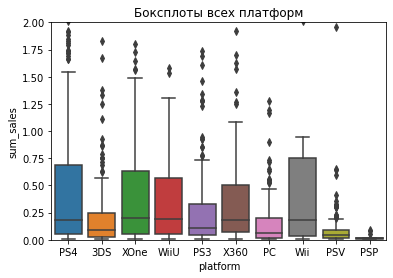

In [37]:
#PS4 3DS XOne PS3 X360

#top = ['PS4', '3DS', 'XOne', 'PS3', 'X360']
#top_platform = new.query('platform in @top')
sns.boxplot(data =new, y = 'sum_sales', x='platform')
plt.ylim([0, 2])
plt.title('Боксплоты всех платформ')

'ящики с усами' показывают,что PS4 XOne wiiU wii и X360 наиболее стабильны

In [38]:
critic_ps4 = new.query('critic_score > 0 and platform == "PS4"')
print(critic_ps4['sum_sales'].corr(critic_ps4['critic_score'])) 

0.40266141068104083


In [39]:
user_ps4 = new.query('user_score > 0 and platform == "PS4"')
print(user_ps4['sum_sales'].corr(user_ps4['user_score'])) 

-0.040131589472697356


Text(0.5, 1.0, 'Отношение оценки пользователей к продажам PS4')

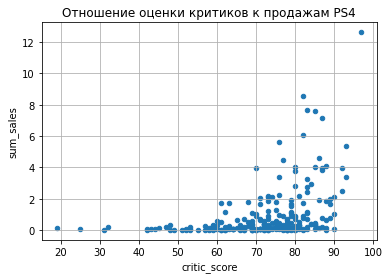

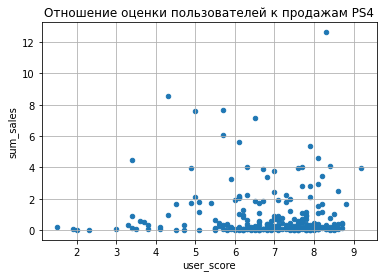

In [40]:
critic_ps4.sort_values('critic_score').plot(x='critic_score',y='sum_sales', kind='scatter', grid=True)
plt.title('Отношение оценки критиков к продажам PS4')
user_ps4.sort_values('user_score').plot(x='user_score',y='sum_sales', kind='scatter', grid=True)
plt.title('Отношение оценки пользователей к продажам PS4')

In [41]:
critic_XOne = new.query('critic_score > 0 and platform == "XOne"')
print('Коэффициент корреляции:',critic_XOne['sum_sales'].corr(critic_XOne['critic_score'])) 

Коэффициент корреляции: 0.42867694370333226


In [42]:
user_XOne = new.query('user_score > 0 and platform == "XOne"')
print('Коэффициент корреляции:', user_XOne['sum_sales'].corr(user_XOne['user_score']))

Коэффициент корреляции: -0.0703839280647581


Text(0.5, 1.0, 'Отношение оценки пользователей к продажам Xone')

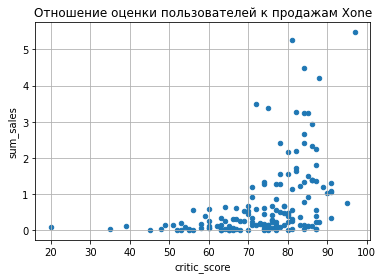

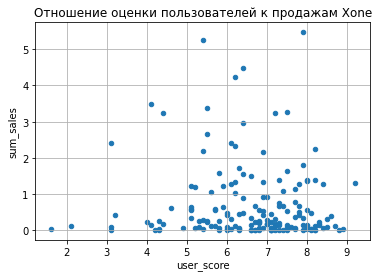

In [43]:
critic_XOne.sort_values('critic_score').plot(x='critic_score',y='sum_sales', kind='scatter', grid=True)
plt.title('Отношение оценки пользователей к продажам Xone')
user_XOne.sort_values('user_score').plot(x='user_score',y='sum_sales', kind='scatter', grid=True)
plt.title('Отношение оценки пользователей к продажам Xone')

 На обеих платформах наблюдается взаимосвязь между оценками критиков и продажами, а вот связи продаж с оценками пользователей на удивление нет

,sum_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


(0.0, 2.0)

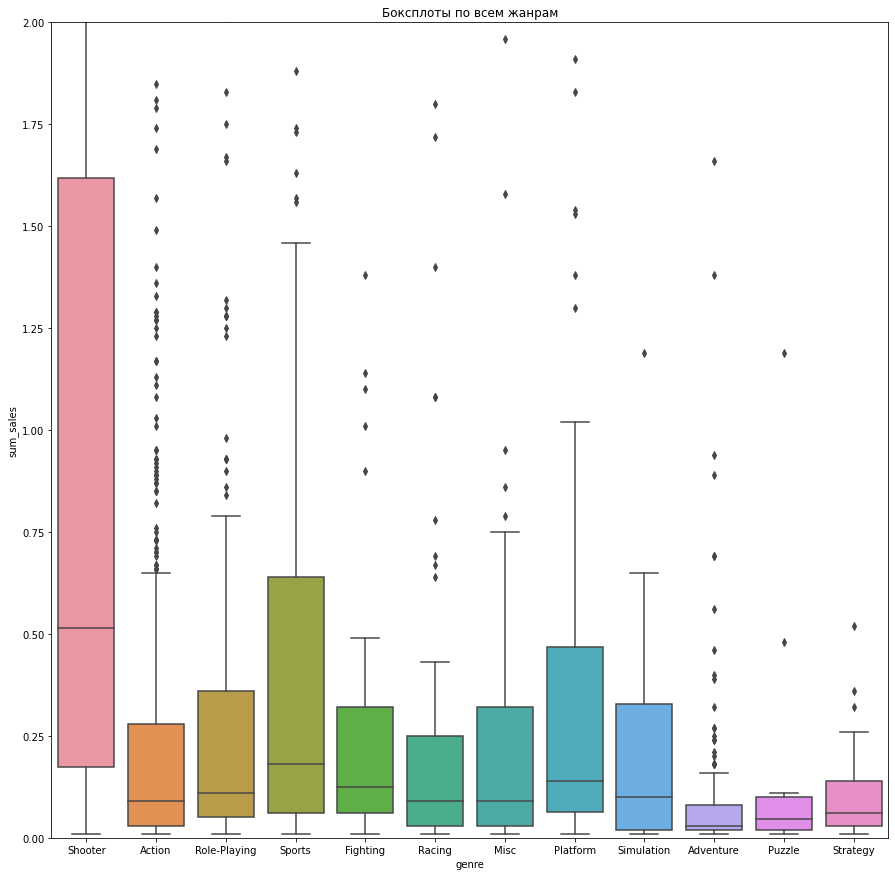

In [44]:
df_genre = new.pivot_table(index = ['genre'] , values = 'sum_sales', aggfunc = 'mean')
display(df_genre.sort_values(by='sum_sales', ascending = False))
plt.figure(figsize=(15,15))
sns.boxplot(data = new, y = 'sum_sales', x='genre')
plt.title('Боксплоты по всем жанрам')
plt.ylim([0, 2])

### Вывод: 
Стрелялки выделяются большими продажами, малым спросом пользуются стратегии(а жаль), пазлы и приключения

## Портрет пользователя каждого региона

In [45]:
df_genre2_na = new.pivot_table(index = ['platform'], values = ['na_sales'], aggfunc = 'mean')
display(df_genre2_na.sort_values(by='na_sales', ascending = False))

,na_sales
platform,
XOne,0.356447
WiiU,0.265205
PS4,0.262261
X360,0.254955
Wii,0.189091
3DS,0.106792
PS3,0.100685
PC,0.047881
PSV,0.008542


In [46]:
df_genre2_eu = new.pivot_table(index = ['platform'], values = ['eu_sales'], aggfunc = 'mean')
display(df_genre2_eu.sort_values(by='eu_sales', ascending = False))


,eu_sales
platform,
PS4,0.345851
Wii,0.235455
XOne,0.202851
WiiU,0.180137
X360,0.139550
PC,0.119007
PS3,0.116621
3DS,0.076038
PSV,0.011966


In [47]:
df_genre2_jp = new.pivot_table(index = ['platform'], values = ['jp_sales'], aggfunc = 'mean')
display(df_genre2_jp.sort_values(by='jp_sales', ascending = False))

,jp_sales
platform,
3DS,0.208679
WiiU,0.100137
PS3,0.051233
PSV,0.049288
PS4,0.039947
PSP,0.027692
XOne,0.001404
X360,0.000721
PC,0.000000


Text(0.5, 1.0, 'Доля платформ на рынке Северной Америки')

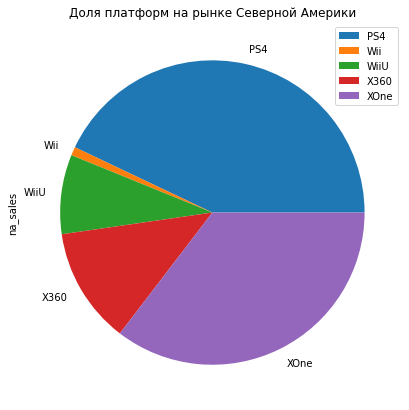

In [48]:
#new.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').plot(kind= 'pie', subplots = True, figsize = (15,7))
#plt.title('Доля платформ на разных рынках')
top_na = ['PS4', 'WiiU', 'XOne', 'Wii', 'X360']
top_platform_na = new.query('platform in @top_na')
top_platform_na.pivot_table(index = 'platform', values = ['na_sales'], aggfunc = 'sum').plot(kind= 'pie',subplots = True, figsize = (15,7))
plt.title('Доля платформ на рынке Северной Америки')

Text(0.5, 1.0, 'Доля платформ на Европейском рынке')

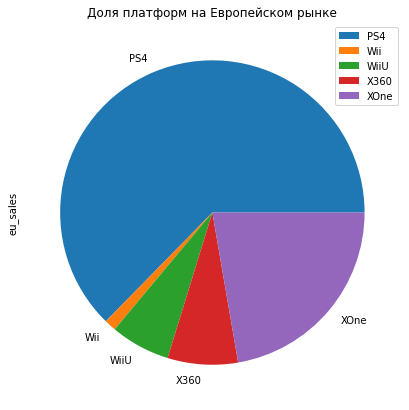

In [49]:
top_eu = ['PS4', 'WiiU', 'XOne', 'Wii', 'X360']
top_platform_eu = new.query('platform in @top_eu')
top_platform_eu.pivot_table(index = 'platform', values = ['eu_sales'], aggfunc = 'sum').plot(kind= 'pie',subplots = True, figsize = (15,7))
plt.title('Доля платформ на Европейском рынке')


Text(0.5, 1.0, 'Доля платформ на Европейском рынке')

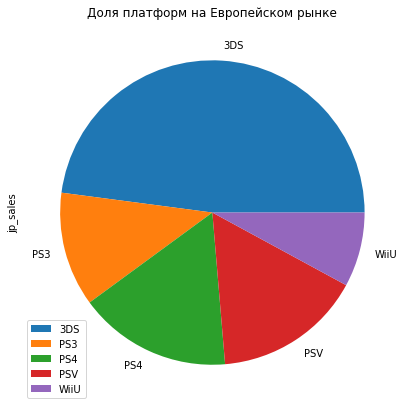

In [50]:
top_jp = ['PS4', 'WiiU', '3DS', 'PS3', 'PSV']
top_platform_jp = new.query('platform in @top_jp')
top_platform_jp.pivot_table(index = 'platform', values = ['jp_sales'], aggfunc = 'sum').plot(kind= 'pie',subplots = True, figsize = (15,7))
plt.title('Доля платформ на Европейском рынке')


В Северной америке более популярен Xbox и PS4 идут вровень, когда как Европейцы предпочитают ПСку. Японцы отличились и здесь, у них входу 3DS

In [51]:
df_genre2_na = new.pivot_table(index = ['genre'], values = ['na_sales'], aggfunc = 'mean')
display(df_genre2_na.sort_values(by='na_sales', ascending = False))

,na_sales
genre,
Shooter,0.617344
Sports,0.286522
Fighting,0.207167
Platform,0.178684
Role-Playing,0.151448
Misc,0.133186
Racing,0.126667
Action,0.117173
Simulation,0.059773


In [52]:
df_genre2_eu = new.pivot_table(index = ['genre'], values = ['eu_sales'], aggfunc = 'mean')
display(df_genre2_eu.sort_values(by='eu_sales', ascending = False))


,eu_sales
genre,
Shooter,0.511875
Sports,0.284037
Racing,0.204783
Platform,0.178947
Simulation,0.165909
Role-Playing,0.127466
Action,0.120646
Misc,0.113805
Fighting,0.111500


In [53]:
df_genre2_jp = new.pivot_table(index = ['genre'], values = ['jp_sales'], aggfunc = 'mean')
display(df_genre2_jp.sort_values(by='jp_sales', ascending = False))

,jp_sales
genre,
Role-Playing,0.140995
Fighting,0.106167
Platform,0.070789
Puzzle,0.066429
Simulation,0.052500
Misc,0.049646
Action,0.047787
Shooter,0.038047
Strategy,0.025676


Text(0.5, 1.0, 'Доля в топ-5 жанров в Северной америке')

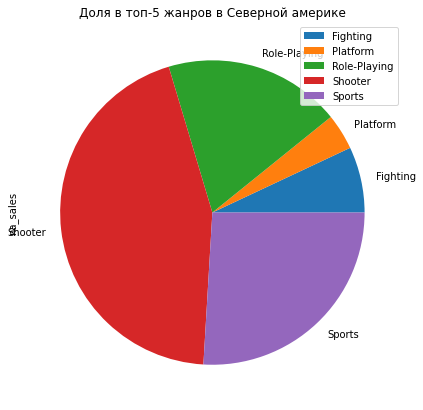

In [54]:
top_na2 = ['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing']
top_genre_na = new.query('genre in @top_na2')
top_genre_na.pivot_table(index = 'genre', values = ['na_sales'], aggfunc = 'sum').plot(kind= 'pie', subplots = True, figsize = (15,7))
plt.title('Доля в топ-5 жанров в Северной америке')

Text(0.5, 1.0, 'Доля в топ-5 жанров в Европе')

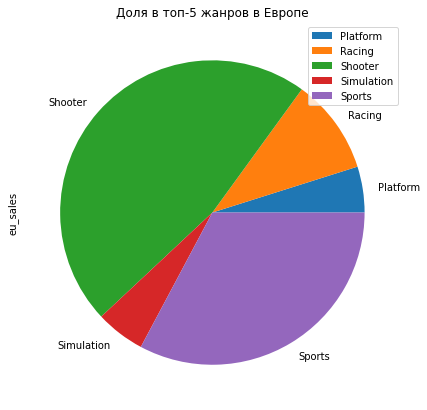

In [55]:
top_eu2 = ['Shooter', 'Sports', 'Platform', 'Racing', 'Simulation']
top_genre_eu = new.query('genre in @top_eu2')
top_genre_eu.pivot_table(index = 'genre', values = ['eu_sales'], aggfunc = 'sum').plot(kind= 'pie', subplots = True, figsize = (15,7))
plt.title('Доля в топ-5 жанров в Европе')


Text(0.5, 1.0, 'Доля в топ-5 жанров в Японии')

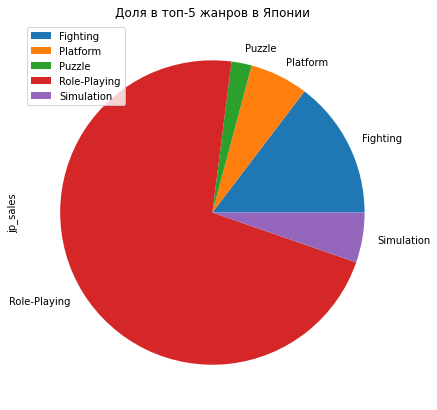

In [56]:
top_jp2 = ['Simulation', 'Puzzle', 'Platform', 'Fighting', 'Role-Playing']
top_genre_jp = new.query('genre in @top_jp2')
top_genre_jp.pivot_table(index = 'genre', values = ['jp_sales'], aggfunc = 'sum').plot(kind= 'pie', subplots = True, figsize = (15,7))
plt.title('Доля в топ-5 жанров в Японии')

Больше всего бросается в глаза любовь Японцев к ролевым играм, и почти полное игнорирование стрелялок и спорта. Вкусы жителей Европы и Северной Америки весьма похожи - они любят шутеры и спорт

,na_sales
rating,
M,96.42
-99,64.72
E,50.74
T,38.95
E10+,33.23


Text(0.5, 1.0, 'Доля рейтинга ESRB в Северной Америке')

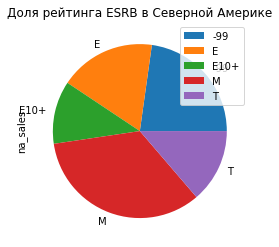

In [57]:
df_rating_na = new.pivot_table(index = ['rating'], values = ['na_sales'], aggfunc = 'sum')
display(df_rating_na.sort_values(by='na_sales', ascending = False))
df_rating_na.plot.pie(y='na_sales')
plt.title('Доля рейтинга ESRB в Северной Америке')

,eu_sales
rating,
M,93.44
-99,58.95
E,58.06
T,34.07
E10+,26.16


Text(0.5, 1.0, 'Доля рейтинга ESRB в Европе')

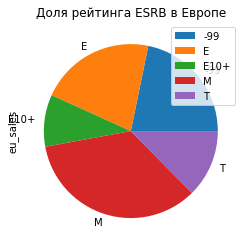

In [58]:
df_rating_eu = new.pivot_table(index = ['rating'], values = ['eu_sales'], aggfunc = 'sum')
display(df_rating_eu.sort_values(by='eu_sales', ascending = False))
df_rating_eu.plot.pie(y='eu_sales')
plt.title('Доля рейтинга ESRB в Европе')

,jp_sales
rating,
-99,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Text(0.5, 1.0, 'Доля рейтинга ESRB в Японии')

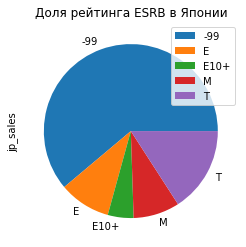

In [59]:
df_rating_jp = new.pivot_table(index = ['rating'], values = ['jp_sales'], aggfunc = 'sum')
display(df_rating_jp.sort_values(by='jp_sales', ascending = False))
df_rating_jp.plot.pie(y='jp_sales')
plt.title('Доля рейтинга ESRB в Японии')

### Вывод:
Лучше всего продаются обычные игры для зрелых людей. В Северной Америке и Европе 75% игр получают рейтинг и влияют на продажи игр. В Японии же примерно 60% игр не имеют оценки, соответственно для этого региона рейтинг ESRB не имеет значения

## Проверим гипотезы

### Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
### Альтернативая гипотеза Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [60]:

#user_XOne = new.query('user_score > 0 and platform == "XOne"')
user_PC = new.query('user_score > 0 and platform == "PC"')
alpha = 0.05
results = st.ttest_ind(user_XOne['user_score'], user_PC['user_score'])
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Нулевая гепотеза: Средние пользовательские рейтинги жанров Action и Sports равны
### Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [61]:
df_action = new.query('user_score > 0 and genre == "Action"')
df_sports = new.query('user_score > 0 and genre == "Sports"')
alpha = 0.05
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'])
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


### Вывод: с большой долей вероятности средние пользовательские оценки игр на платформах Хбокс и ПК одинаковые. А вот оценки экшен игр и спортивных разнятся


## Общий вывод: 
Наш интернет магазин собрал хорошие данные. В результате их анализа удалось установить актуальный период равный 3 годам. В данных за последние 3 года однозначно наблюдается рост платформ XOne и PS4. Рекомендую делать ставку именно на эти платформы. Так же хочу обратить внимание,что важно продвижение игр среди профессиональных критиков. Их оценкам стоит уделить особое внимание.НА рынках Северной Америки и Европы средние продажи шутеров очень сильно превосходят всех конкурентов и упор надо сделать именно на них. Но вот в случае с Японией наш выбор ролевые игры